In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse, Circle
import seaborn as sns
from EpiClockInvasiveBRCA.src.util import consts
import simulation as sim

In [7]:
figure_outdir = 'figures'
os.makedirs(figure_outdir, exist_ok=True)

In [8]:
# scale factor
sf = 0.4

figsize = np.array([7, 6])
labelfontsize = 25
ticksfontsize = 18
opacity = 0.8
linewidth = 1
fliersize = 1

color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]
sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

## Example 3 sites

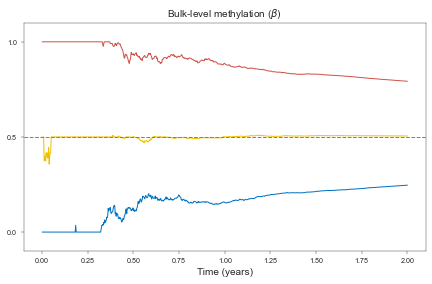

In [9]:
figsize = np.array([18, 10.5])

beta_arr = np.loadtxt(os.path.join('3_sites', 'beta_values.txt'), delimiter='\t', dtype=float)

plot_data = pd.melt(pd.DataFrame(beta_arr).reset_index(), ['index'])
plot_data['Year'] = plot_data['index'] / 365
nyears = plot_data['Year'].max()

color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

fig, ax = plt.subplots(figsize=figsize * sf)

plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable',
                    palette=color_list, linestyle='solid', linewidth=2.5 * sf)

xlim = (-0.1, plot_data['Year'].max() + 0.1)

ax.set_ylim((-0.1, 1.1))
ax.set_yticks([0, 0.5, 1])
ax.set_title('Bulk-level methylation ($β$)', fontsize=labelfontsize * sf)
ax.set_ylabel('')
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.legend('', frameon=False)

line_x = np.linspace(xlim[0], xlim[1], 100)
line_y = [0.5] * 100
ax.plot(line_x, line_y, color="grey", linestyle='dashed', linewidth=1.0)

ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

ax.set_xlim(xlim)

fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites.pdf'), format='pdf', pad_inches=0.1)

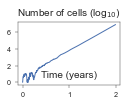

In [10]:
n_cells_list = np.loadtxt(os.path.join('3_sites', 'n_cells.txt'), dtype=int)

figsize = np.array([11, 7])

plot_data = pd.DataFrame(data=np.log10(n_cells_list), columns=['log10_n_cells'])
plot_data['Year'] = plot_data.index / 365
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]


fig, ax = plt.subplots(figsize=figsize * 5 / 12 * sf)

plot = sns.lineplot(ax=ax, x='Year', y='log10_n_cells', data=plot_data,
                    linestyle='solid', linewidth=2.5 * sf)

xlim = (-0.1, nyears + 0.1)

ax.set_title('Number of cells (log$_{10}$)', fontsize=labelfontsize * sf)
ax.set_ylabel('')
# ax.yaxis.set_label_coords(0.0, 1.07)
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.legend('', frameon=False)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)
ax.xaxis.set_label_coords(0.5, 0.23)

ax.set_xlim(xlim)

fig.savefig(os.path.join(figure_outdir, 'simulation_3_sites_n_cells.pdf'), format='pdf', pad_inches=0.1)

## Ensemble of 90 sites

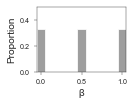

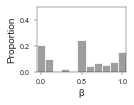

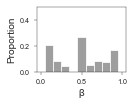

In [6]:
beta_values_arr = np.loadtxt(os.path.join('90_sites', 'beta_values.txt'), delimiter='\t', dtype=float).T
n_CpGs_each = 30

figsize = np.array([4, 3])

total_days = beta_values_arr.shape[1] - 1
time_checkpoints = [0, int(total_days/2), total_days]
color_list = [consts['palette_jco'][i] for i in [0, 1, 3]]

k = 0
for chk in time_checkpoints:
    fig, ax = plt.subplots(figsize=figsize * sf)
    
    # should ot have binwidth and bins
    sim.plotBetaValues(ax, beta_values=beta_values_arr[:, chk],
                   binwidth=0.1, color=consts['palette_jco'][2], opacity=opacity,
                   labelfontsize=labelfontsize, ticksfontsize=ticksfontsize, sf=sf, bins=np.linspace(-0.05, 1.05, 12))
    ax.set_ylim(0, 0.5)
    
    
#     for j in range(3):
#         beta = np.mean(beta_values_arr[j*n_CpGs_each:(j+1)*n_CpGs_each, chk])     # Mean of sites in group
#         y_height = ax.get_ylim()[1]
#         ax.add_patch(Ellipse((beta, y_height/10), 0.25 * sf, 0.3*y_height * sf, color=color_list[j]))
    
    fig.savefig(os.path.join(figure_outdir, f'simulation_300_sites_hist_{k}.pdf'), format='pdf', pad_inches=0.1)
    
    k += 1

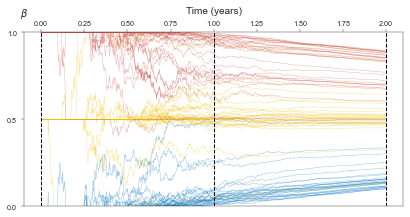

In [7]:
figsize = np.array([17, 8])

data_list = []
for j in range(3):
    data = pd.melt(pd.DataFrame(
        beta_values_arr[j*n_CpGs_each:(j+1)*n_CpGs_each]
    ).T.reset_index(), ['index'])
    data['Year'] = data['index'] / 365
    data['variable'] += n_CpGs_each * j
    data_list.append(data)

plot_data = pd.concat(data_list, axis=0)
nyears = plot_data['Year'].max()

palette = np.concatenate([[color]*n_CpGs_each for color in color_list]).tolist()

fig, ax = plt.subplots(figsize=figsize * sf)

plot = sns.lineplot(ax=ax, x='Year', y='value', data=plot_data,
                    hue='variable', palette=palette,
                    linestyle='solid', linewidth=1 * sf, alpha=0.5
                   )

xlim = (-0.1, nyears + 0.1)

ax.set_ylim(0, 1)
ax.set_xlim(xlim)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    labeltop=True)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)
ax.set_yticks([0, 0.5, 1])
ax.set_ylabel('$β$', rotation=0, fontsize=labelfontsize * sf)
ax.yaxis.set_label_coords(0.0, 1.07)
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.xaxis.set_label_coords(0.5, 1.15)
ax.legend('', frameon=False)

for t in time_checkpoints:
    ax.axvline(x = t / 365, linestyle='dashed', color='black', linewidth=2.5 * sf)

fig.savefig(os.path.join(figure_outdir, 'simulation_300_sites.pdf'), format='pdf', pad_inches=0.1)

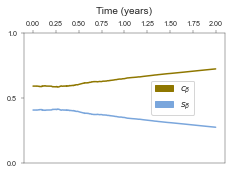

In [8]:
s_beta = np.std(beta_values_arr, axis=0)
c_beta = 1 - s_beta

figsize = np.array([9, 6])

fig, ax = plt.subplots(figsize=figsize * sf)

year_arr = np.arange(0, nyears*365 + 1) / 365
ax.plot(year_arr, s_beta, color=consts['palette_jco'][4])
ax.plot(year_arr, c_beta, color=consts['palette_jco'][6])

xlim = (-0.1, nyears + 0.1)

ax.set_ylim(0, 1)
ax.set_xlim(xlim)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    labeltop=True)

ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel('Time (years)', fontsize=labelfontsize * sf)
ax.xaxis.set_label_coords(0.5, 1.2)

patches = [
    mpatches.Patch(color=consts['palette_jco'][6], label='$c_β$'),
    mpatches.Patch(color=consts['palette_jco'][4], label='$s_β$')
]
leg = fig.legend(
    handles=patches,
    loc='upper right',
    bbox_to_anchor=(0.8, 0.63),
    fontsize=0.9*labelfontsize * sf,
)

fig.savefig(os.path.join(figure_outdir, 'simulation_300_sites_c_s_beta.pdf'), format='pdf', pad_inches=0.1)

## Different death rates

In [9]:
n_cells_list = [
    np.loadtxt(os.path.join('3_sites', 'n_cells.txt'), dtype=int),
    np.loadtxt(os.path.join('larger_death_rate', 'n_cells.txt'), dtype=int)
]
death_rate_list = [0.14, 0.15]
growth_rate = 0.16

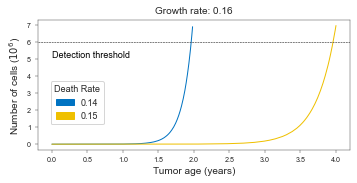

In [10]:
figsize = np.array([14,  6])

scale = 10**6

plot_data = pd.concat([pd.DataFrame({'n_cells':n_cells_list[j], 'Death Rate':round(death_rate_list[j], 2)}) for j in range(2)], axis=0).reset_index()
plot_data = plot_data.loc[plot_data['n_cells'] <= plot_data.groupby('Death Rate')['n_cells'].max().min()]
plot_data['Year'] = plot_data['index'] / 365
plot_data['n_cells'] /= scale
color_list = [consts['palette_jco'][i] for i in [0, 1]]
color_dict = dict(zip(plot_data['Death Rate'].unique(), color_list))

fig, ax = plt.subplots(figsize=figsize * sf)

plot = sns.lineplot(ax=ax, x='Year', y='n_cells', data=plot_data,
                    hue='Death Rate', legend=False,
                    palette=color_dict, linestyle='solid', linewidth=2.5 * sf)

ax.set_title(f'Growth rate: {growth_rate}', fontsize=labelfontsize * sf)
ax.set_ylabel(f'Number of cells ($10^{int(np.log10(scale))}$)', fontsize=labelfontsize * sf)
ax.set_xlabel('Tumor age (years)', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

patches = [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict.keys()]
leg = fig.legend(
    title = 'Death Rate',
    handles=patches,
    loc='upper right',
    bbox_to_anchor=(0.3, 0.55),
    fontsize=0.9*labelfontsize * sf,
)

leg.get_title().set_fontsize(0.9*labelfontsize * sf)

ax.axhline(y=6, ls='--', lw=0.5, color='black')
ax.text(0, 5, 'Detection threshold',
        ha="left", va="bottom", fontfamily='sans-serif', color='black',
        fontsize=labelfontsize * 0.9 * sf)

fig.savefig(os.path.join(figure_outdir, 'simulation_different_death_rates.pdf'), format='pdf', pad_inches=0.1)

## Synchronous metastasis

In [4]:
beta_values = {}
beta_values['ensmbl_1'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_1.txt'), delimiter='\t', dtype=float)
beta_values['ensmbl_1_met'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_1_met.txt'), delimiter='\t', dtype=float)
# beta_values['ensmbl_2'] = np.loadtxt(os.path.join('synchro_met', 'beta_values_ensmbl_2.txt'), delimiter='\t', dtype=float)
beta_values['ensmbl_2'] = np.loadtxt(os.path.join('90_sites', 'beta_values.txt'), delimiter='\t', dtype=float)

rvalues_met_list = []
rvalues_control_list = []

day_rg = range(beta_values['ensmbl_1'].shape[0])
for day in day_rg:
    beta_1 = beta_values['ensmbl_1'][day]
    beta_1_met = beta_values['ensmbl_1_met'][day]
    beta_2 = beta_values['ensmbl_2'][day]
    
    rvalues_met_list.append(sim.betaCorr(beta_1, beta_1_met))
    rvalues_control_list.append(sim.betaCorr(beta_1, beta_2))

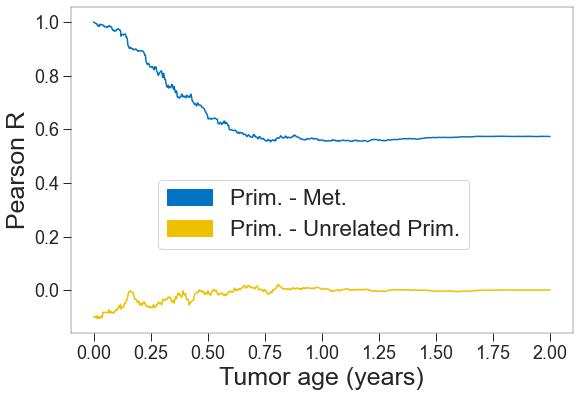

In [237]:
figsize = np.array([9, 6])
sf = 1

fig, ax = plt.subplots(figsize=figsize * sf)

color_dict = dict(zip(['Prim. - Met.', 'Prim. - Unrelated Prim.'], consts['palette_jco']))

xvals = np.array(day_rg) / 365

ax.plot(xvals, rvalues_met_list, color=color_dict['Prim. - Met.'])
ax.plot(xvals, rvalues_control_list, color=color_dict['Prim. - Unrelated Prim.'])

ax.set_ylabel(f'Pearson R', fontsize=labelfontsize * sf)
ax.set_xlabel('Tumor age (years)', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

patches = [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict.keys()]
leg = fig.legend(
    handles=patches,
    loc='center',
    bbox_to_anchor=(0.5, 0.4),
    fontsize=0.9*labelfontsize * sf,
)

fig.savefig(os.path.join(figure_outdir, 'synchro_met.pdf'), format='pdf', pad_inches=0.1)

## Late metastasis

In [17]:
indir = 'sc_met'

r_values_df = pd.read_table(os.path.join(indir, 'r_values.txt'), index_col=0)
r_values_df = r_values_df.T.rename(columns=lambda x:round(x/365, 2))

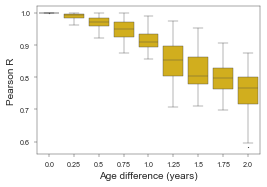

In [24]:
figsize = np.array([10, 6.8])

fig, ax = plt.subplots(figsize=figsize * sf)

sns.boxplot(ax=ax, data=r_values_df, color=consts['palette_jco'][1], linewidth=linewidth * sf, fliersize=fliersize * sf)

skip_n = 4
# ax.set_xticks(ax.get_xticks()[::skip_n])
# ax.set_xticklabels([round(yr, 2) for yr in years_arr[::skip_n]])
ax.set_xlabel('Age difference (years)', fontsize=labelfontsize * sf)
ax.set_ylabel('Pearson R', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

fig.savefig(os.path.join(figure_outdir, 'late_met.pdf'), format='pdf', pad_inches=0.1)